In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Posisi_gaji.csv")
dataset

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x = dataset.iloc[:, 1:2].values #agar menjadi matriks, bukan vektor
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y = dataset.iloc[:, 2:3].values #agar menjadi matriks, bukan vektor
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [6]:
#Dalam kasus ini tidak perlu pembagian train & test set karena data terlalu kecil (<15) 
#Feature scaling ==> diperlukan karena library SVM tidak memiliki fitur Feature Scaling
from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
scY = StandardScaler()

In [7]:
x = scX.fit_transform(x)
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y = scY.fit_transform(y)
y = y.ravel() #Change shape agar tidak ada warning saat fitting SVR
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [9]:
#Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel="rbf") #rbf(radial basis function) adalah kernel default untuk SVR, cocok untuk data non-linear
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0, 0.5, 'Gaji')

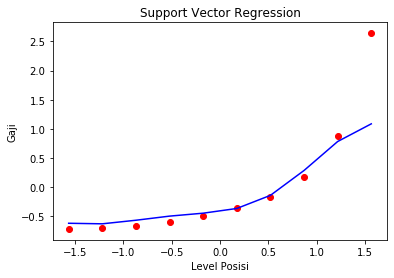

In [10]:
#Visualisasi hasil SVR
plt.scatter(x, y, color="red")
plt.plot(x, regressor.predict(x), color="blue")
plt.title("Support Vector Regression")
plt.xlabel("Level Posisi")
plt.ylabel("Gaji")

In [11]:
#Memprediksi hasil SVR
#yPred = regressor.predict(6.5)
#yPred = regressor.predict(scX.transform(6.5))
#yPred = regressor.predict(scX.transform([[6.5]]))
#yPred = regressor.predict(scX.transform(np.array([[6.5]])))
yPred = scY.inverse_transform(regressor.predict(scX.transform(scX.inverse_transform(x)))) #Membalikkan/invers dari Feature Scaling
yPred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

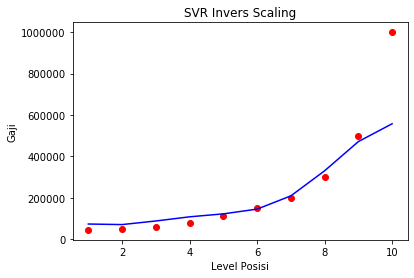

In [14]:
plt.scatter(scX.inverse_transform(x), scY.inverse_transform(y), color="red")
plt.plot(scX.inverse_transform(x), yPred, color="blue")
plt.title("SVR Invers Scaling")
plt.xlabel("Level Posisi")
plt.ylabel("Gaji")
plt.show()

In [ ]:
#Visualisasi hasil SVR resolusi tinggi/halus
xGrid = np.arange(min(x), max(x), 0.1) #pilih 0.01 bukan 0.1, karena datanya sudah melalui feature scaling
xGrid

In [ ]:
xGrid = xGrid.reshape((len(xGrid), 1)) #atau xGrid.reshape(-1, 1)
xGrid

In [ ]:
plt.scatter(x, y, color="red")
plt.plot(xGrid,regressor.predict(xGrid), color="blue")
plt.title("SVR High Resolution")
plt.xlabel("Level Posisi")
plt.ylabel("Gaji")
plt.show()